In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('BINANCE_BTCUSDTPERP, 240 OI.csv')

In [3]:
data.dropna(axis=1, how='all', inplace=True)

In [4]:
data.dropna(inplace=True)

In [5]:
col = data.columns
print(col)

Index(['time', 'open', 'high', 'low', 'close', 'Volume', 'Volume MA',
       'Crypto Open Interest (Ouverture)', 'Crypto Open Interest (Haut',
       'Crypto Open Interest (Bas)', 'Crypto Open Interest (Fermeture)'],
      dtype='object')


In [6]:
data.drop(col[0], axis=1, inplace=True)

In [7]:
data

,open,high,low,close,Volume,Volume MA,Crypto Open Interest (Ouverture),Crypto Open Interest (Haut,Crypto Open Interest (Bas),Crypto Open Interest (Fermeture)
347,48550.00,48863.0,48205.63,48680.23,48212.780,61559.22555,59491.861,59496.616,58475.934,58627.253
348,48680.23,49556.2,48260.87,49273.28,54425.535,59378.35205,58606.715,58662.696,56943.638,57158.947
349,49273.28,50476.0,49100.00,50306.81,92444.018,59463.20575,57191.055,60965.881,57191.055,59982.045
350,50306.82,50443.0,50050.01,50180.25,38199.355,58720.45640,59974.239,61976.569,59926.054,61799.840
351,50180.26,50600.0,50000.00,50418.05,51298.339,58375.64015,61807.331,62271.403,61381.664,62268.871
...,...,...,...,...,...,...,...,...,...,...
1897,35466.70,35504.0,34150.00,34475.70,116406.159,66175.07805,91199.901,91496.416,89168.262,90707.932
1898,34475.70,34957.6,34316.90,34593.00,49841.833,67182.50505,90730.643,92226.546,90716.967,92134.571
1899,34592.90,34872.8,34500.00,34781.20,32927.810,67722.65440,92141.294,93988.342,92102.511,93980.774
1900,34780.50,34842.7,34256.50,34360.60,56606.284,69445.59300,93986.594,94227.764,92010.084,93527.285


<AxesSubplot:>

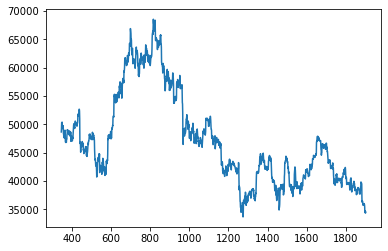

In [8]:
data['close'].plot()

<AxesSubplot:>

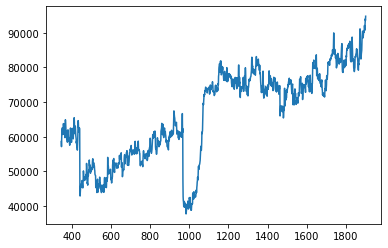

In [9]:
data[col[10]].plot()

<AxesSubplot:>

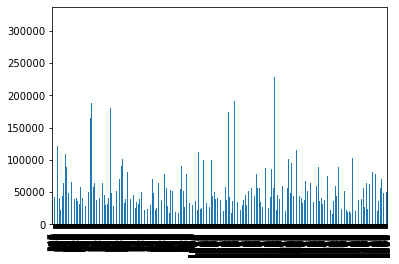

In [10]:
data[col[5]].plot(kind="bar")

<AxesSubplot:>

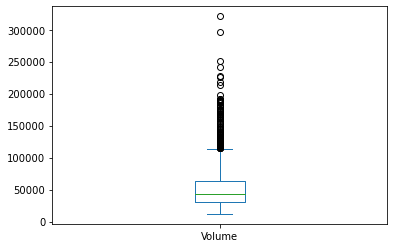

In [11]:
data[col[5]].plot.box()

In [12]:
window_size = 10

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [14]:
training_data = scaled

In [15]:
X_train = [] 
Y_train = []

In [16]:
training_data.shape[0]

1555

In [17]:
for i in range(window_size, training_data.shape[0]):
    X_train.append(training_data[i-window_size:i])
    Y_train.append(training_data[i])

In [18]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
print("From", data.shape, "To", X_train.shape)

From (1555, 10) To (1545, 10, 10)


In [19]:
ratio = int(len(X_train)/window_size * 1/4)

In [20]:
X_train, Y_train = X_train[:-window_size*ratio], Y_train[:-window_size*ratio]
X_test, Y_test = X_train[len(X_train)-window_size*ratio:], Y_train[len(Y_train)-window_size*ratio:]

In [21]:
print(X_train.shape)
print(X_test.shape)

(1165, 10, 10)
(380, 10, 10)


In [22]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import tensorflow as tf

model = Sequential()

model.add(Normalization())

model.add(LSTM(128, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(Dropout(0.2)) 
model.add(LSTM(256, activation = 'relu', return_sequences = True))

model.add(Dropout(0.3)) 
model.add(LSTM(512, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4)) 
model.add(LSTM(16, activation = 'relu'))

model.add(Dropout(0.5)) 
model.add(Dense(len(Y_train[0])))

optimizer = tf.keras.optimizers.Adam(clipnorm=1)


model.compile(optimizer = optimizer, loss = 'mean_squared_error')

In [23]:
history= model.fit(X_train, Y_train, epochs = 40, batch_size =200, validation_split=0.1)

Epoch 1/40
6/6 [==============================] - 7s 499ms/step - loss: 0.1712 - val_loss: 0.0725
Epoch 2/40
6/6 [==============================] - 2s 328ms/step - loss: 0.1203 - val_loss: 0.1103
Epoch 3/40
6/6 [==============================] - 2s 416ms/step - loss: 0.1103 - val_loss: 0.0724
Epoch 4/40
6/6 [==============================] - 3s 465ms/step - loss: 0.0985 - val_loss: 0.0745
Epoch 5/40
6/6 [==============================] - 2s 363ms/step - loss: 0.0914 - val_loss: 0.0656
Epoch 6/40
6/6 [==============================] - 2s 360ms/step - loss: 0.0874 - val_loss: 0.0586
Epoch 7/40
6/6 [==============================] - 2s 392ms/step - loss: 0.0807 - val_loss: 0.0552
Epoch 8/40
6/6 [==============================] - 2s 347ms/step - loss: 0.0761 - val_loss: 0.0490
Epoch 9/40
6/6 [==============================] - 2s 326ms/step - loss: 0.0728 - val_loss: 0.0404
Epoch 10/40
6/6 [==============================] - 2s 326ms/step - loss: 0.0701 - val_loss: 0.0450
Epoch 11/40
6/6 [==

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10, 10)           21        
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 10, 128)           71168     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 256)           394240    
                                                                 
 dropout_1 (Dropout)         (None, 10, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 512)           1574912   
                                                        

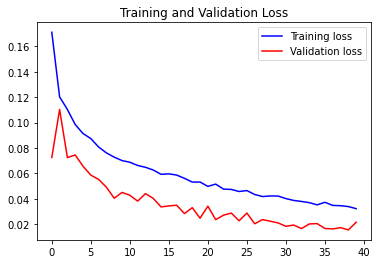

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [27]:
len(X_test)

380

In [28]:
def diff_perc(entree, sortie):
    perc = abs(sortie - entree) / entree
    if sortie - entree > 0:
        return perc
    else:
        return -perc

In [29]:
depth = 20
tries = 0
val = []

perc = []

for num in range(1, len(X_test) - depth):
    print(num, end='\r')
    pred = []
    price = X_test[num]
    tries += 1

    for i in range(depth):

        pred_1 = model.predict(price)
        pred.append(pred_1[0][0])

        price = list(price)
        price.append(pred_1[0])
        price = np.array(price[1:])


    real = Y_test[num:depth+num, 1]
    perc.append( [diff_perc(pred[0], pred[-1]) , diff_perc(real[0], real[-1])] ) 

    val.append( (pred[-1] - pred[0])* (real[-1] - real[0]) >= 0 )

perc = np.array(perc)
perc = perc*100

<ipython-input-28-11df620ac0d7>:2: RuntimeWarning: divide by zero encountered in double_scalars
  perc = abs(sortie - entree) / entree


In [30]:
counts = np.array(np.unique(val, return_counts=True)).T

In [31]:
print(counts[1][1] / len(val) *100, " % of correct trends on", tries, "tries")

76.6016713091922  % of correct trends on 359 tries


In [32]:
print(perc)

[[-2.66334355e+01 -5.16282782e+00]
 [-2.67117739e+01 -5.97380999e+00]
 [-2.76299745e+01 -2.31783230e+01]
 [-2.82831699e+01 -2.82179991e+01]
 [-2.84361273e+01 -3.11316761e+01]
 [-2.87166059e+01 -3.07957276e+01]
 [-2.89802551e+01 -3.21399926e+01]
 [-2.89630622e+01 -3.08894334e+01]
 [-2.90400237e+01 -2.59752710e+01]
 [-2.93035746e+01 -2.81526988e+01]
 [-2.95916080e+01 -3.78451454e+01]
 [-2.94877857e+01 -2.94193213e+01]
 [-2.92870879e+01 -3.19109230e+01]
 [-2.91608304e+01 -3.92928792e+01]
 [-2.91774541e+01 -3.89998370e+01]
 [-2.91802227e+01 -3.46122340e+01]
 [-2.87379920e+01 -3.75261953e+01]
 [-2.78079152e+01 -3.56394357e+01]
 [-2.66102821e+01 -3.95518091e+01]
 [-2.61175811e+01 -4.08087478e+01]
 [-2.63765574e+01 -3.51724138e+01]
 [-2.69875526e+01 -2.54242135e+01]
 [-2.81749457e+01 -1.77587305e+01]
 [-2.70054251e+01 -1.41221160e+01]
 [-2.46107399e+01 -1.49887239e+01]
 [-2.16461778e+01 -5.55768804e+00]
 [-1.80918515e+01 -7.81573318e+00]
 [-1.38581604e+01 -1.67008323e+01]
 [-9.59370434e+00 -1